# 04_ Training CNN [Convolutional Neural Network Model] for Gunshot Classification
#### Load data - Augmenting - Training

In [5]:
#_Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle
import scipy
import tensorflow as tf
import warnings

import random

In [6]:
#_load pickle data
import os

directory = fr'N:\Mark\Audio Diss\pickle_data' #change directory to containing drives
gt_pickle_name = 'gt_processed_audio.pickle'
gs_pickle_name = 'extracted_gunshots.pickle'
#gt_supp_pickle_name = ''
gs_supp_pickle_name = 'gs_supp_data.pickle'

gt_dir = os.path.join(directory, gt_pickle_name)
gs_dir = os.path.join(directory, gs_pickle_name)
#gts_dir = os.path.join(directory, gt_supp_pickle_name)
gss_dir = os.path.join(directory, gs_supp_pickle_name)


file_list = [gt_dir, gs_dir, gss_dir] #gts_dir removed

if all(os.path.isfile(os.path.join(directory, x)) for x in file_list):
    for x in file_list:
        gt_data = pd.read_pickle(gt_dir)
        gs_data = pd.read_pickle(gs_dir)
        #gt_supp = pd.read_pickle(gts_dir)
        gs_supp = pd.read_pickle(gss_dir)
        print(x, 'loaded')
else:
    print('Not all files exist')

N:\Mark\Audio Diss\pickle_data\gt_processed_audio.pickle loaded
N:\Mark\Audio Diss\pickle_data\extracted_gunshots.pickle loaded
N:\Mark\Audio Diss\pickle_data\gs_supp_data.pickle loaded


In [10]:
#_Creating x_data, y_data full + supplementary
gt_data['gunshot'] = 0
#gt_supp['gunshot'] = 0

gs_data['gunshot'] = 1
gs_supp['gunshot'] = 1

#_ Selecting columns from gt_data
gt_columns = ['file_name', 'r_type', 'date', 'year', 'gunshot','signal', 'sample_rate',
              'mel_spectrogram', 'log_mel_spectrogram', 'mfcc', 'ssm',
              'shape', 'lms_r', 'mfcc_r', 'ssm_r']
gt_selected = gt_data[gt_columns]

gs_columns = ['file_name', 'r_type', 'date', 'year', 'gunshot','signal', 'sample_rate',
              'mel_spectrogram', 'log_mel_spectrogram', 'mfcc', 'ssm',
              'shape', 'lms_r', 'mfcc_r', 'ssm_r']
gs_selected = gs_data[gs_columns]

# gts_columns = ['file_name', 'r_type', 'date', 'year', 'gunshot','signal', 'sample_rate',
#               'mel_spectrogram', 'log_mel_spectrogram', 'mfcc', 'ssm',
#               'shape', 'lms_r', 'mfcc_r', 'ssm_r']
#gts_selected = gt_supp[gts_columns]

gss_columns = ['file_name', 'r_type', 'date', 'year', 'gunshot','signal', 'sample_rate',
              'mel_spectrogram', 'log_mel_spectrogram', 'mfcc', 'ssm',
              'shape', 'lms_r', 'mfcc_r', 'ssm_r']
gss_selected = gs_supp[gss_columns]

#_Combine all dataframes
combined_data = pd.concat([gt_selected, gs_selected, gss_selected], ignore_index=True) #gts_selected

#create x_data, y_data
x_image = []
#create a new dataframe that only contains image
for i in combined_data.index:
    i_lms = combined_data.iloc[i]['lms_r']
    i_mfcc = combined_data.iloc[i]['mfcc_r']
    i_ssm = combined_data.iloc[i]['ssm_r']
    
    i_stack = tf.stack([i_lms,i_mfcc,i_ssm], axis=-1)
    x_image.append(i_stack)
    #x_fname.append(i_fname)

#create a new dataframe that contains gunshot labels and filenames
y_gunshot = []
for i in combined_data.index:
    i_gunshot = combined_data.iloc[i]['gunshot']
    y_gunshot.append(i_gunshot)
    
print('Len of x_image:', len(x_image))
print('Len of y_gunshot:', len(y_gunshot))


Len of x_image: 7938
Len of y_gunshot: 7938


In [11]:
# Define your data augmentation transformations
def data_augmentation(image):
    # Apply random horizontal flip
    image = tf.image.random_flip_left_right(image)
    # Apply random rotation
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    # Apply random brightness adjustment
    image = tf.image.random_brightness(image, max_delta=0.2)
    # Apply random contrast adjustment
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    return image

# Augment the x_image data
augmented_x_image = []
for image in x_image:
    augmented_image = data_augmentation(image)
    augmented_x_image.append(augmented_image)

In [9]:
#_Train Test Split - train_images, test_images, train_labels, test_labels
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

#X = np.asarray(x_image) #Normal data
X = np.asarray(augmented_x_image) #Augmented data
y = y_gunshot

train_images, test_images, train_labels, test_labels = train_test_split(X, y, train_size=0.8, random_state=42)

In [10]:
#_Show random images function
def show_random_images(train_images,
                       class_names,
                       train_labels,
                       nb_samples=12,
                       nb_row=4):
    plt.figure(figsize=(12, 12))
    random_indices = random.sample(range(len(train_images)), nb_samples)
    for i, index in enumerate(random_indices):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        #clipped_image = np.clip(train_images[index],0,1)
        plt.imshow(train_images[index], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[index]])

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

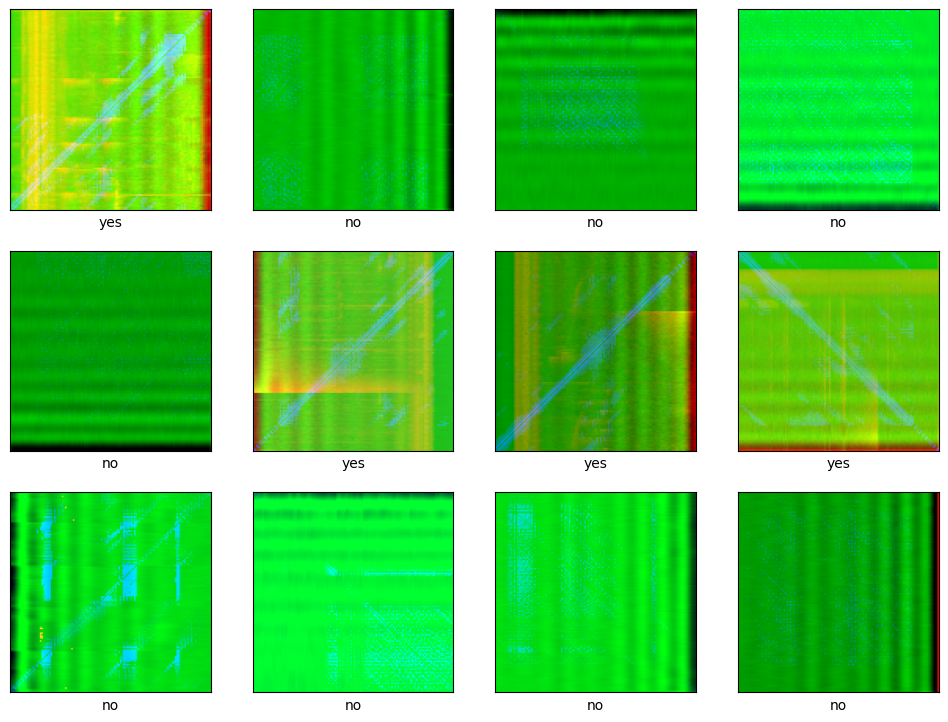

In [12]:
#_Preview sample of images & labels
class_names = ['no', 'yes']
show_random_images(train_images, class_names, train_labels)
#show_random_images(train_images, class_names, train_labels)

In [ ]:
# max_pixel_value = 255

# mp_train_images = train_images / max_pixel_value
# mp_test_images = test_images / max_pixel_value #maybe do not need as we've normalised already

In [13]:
#_Label variables
train_labels = np.asarray(train_labels, dtype=np.float32)
test_labels = np.asarray(test_labels, dtype=np.float32)

In [14]:
#_Tokenising labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [16]:
#_The Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Variables
INPUT_SHAPE = (128, 128, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Dropout(0.25)) #dropout to avoid overfitting

model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [17]:
#_Model Architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [18]:
#_ Metrics, Batch size, Epochs, Optimiser and Early stopping
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

BATCH_SIZE = 32
EPOCHS = 10
METRICS = ['accuracy', Precision(name='precision'), Recall(name='recall')]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Define the LearningRateScheduler callback
def lr_schedule(epoch):
    initial_learning_rate = 0.1
    decay_steps = 5
    decay_rate = 0.5
    return initial_learning_rate * decay_rate ** (epoch // decay_steps)

learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with callbacks
training_history = model.fit(train_images, train_labels,
                             epochs=EPOCHS, batch_size=BATCH_SIZE,
                             validation_data=(test_images, test_labels),
                             callbacks=[early_stopping, learning_rate_scheduler])

Epoch 1/10
15/15 [==============================] - 24s 1s/step - loss: 1.2355 - accuracy: 0.8070 - precision: 0.8070 - recall: 0.8070 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.1000
Epoch 2/10
15/15 [==============================] - 22s 2s/step - loss: 0.0070 - accuracy: 0.9978 - precision: 0.9978 - recall: 0.9978 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.1000
Epoch 3/10
15/15 [==============================] - 20s 1s/step - loss: 7.8427e-10 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.1000
Epoch 4/10
15/15 [==============================] - 21s 1s/step - loss: 3.2874e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.1000


In [19]:
#_Graph Function
def show_performance_curve(training_result, metric, metric_label):
    train_perf = training_result.history[metric]
    validation_perf = training_result.history['val_' + metric]
    intersection_idx = np.argwhere(np.isclose(train_perf, validation_perf, atol=1e-2)).flatten()[0]
    intersection_value = train_perf[intersection_idx]

    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label='val_' + metric)
    plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
 

    plt.annotate(f'Optimal_Value: {intersection_value:.4f}',
                 xy=(intersection_idx, intersection_value),
                 xycoords='data',
                 fontsize=10,
                 color='green')
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')

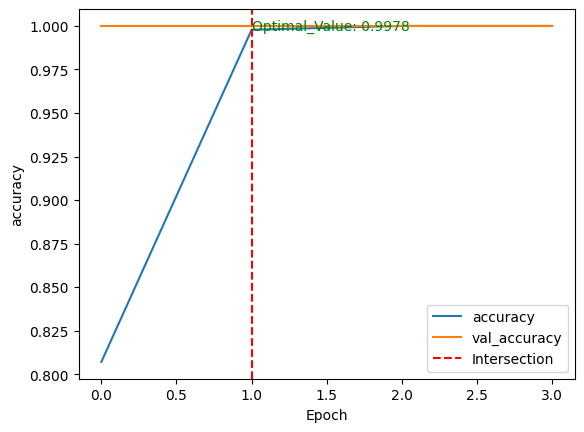

In [20]:
#_Accuracy Graph
show_performance_curve(training_history, 'accuracy', 'accuracy')

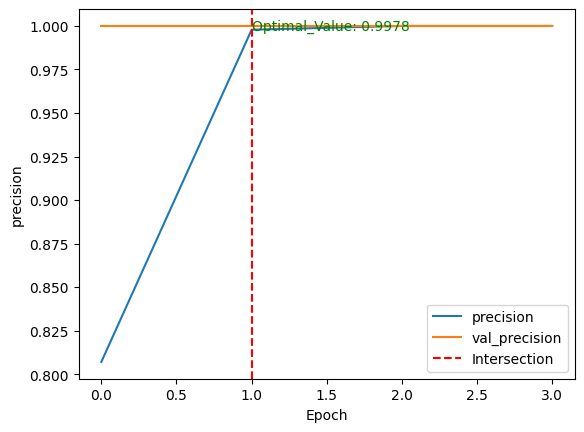

In [21]:
#_Precision Graph
show_performance_curve(training_history, 'precision', 'precision')

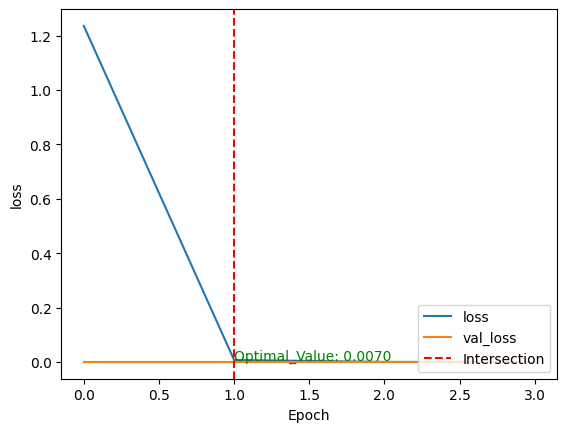

In [22]:
#_Loss Graph
show_performance_curve(training_history, 'loss', 'loss')

4/4 [==============================] - 2s 522ms/step


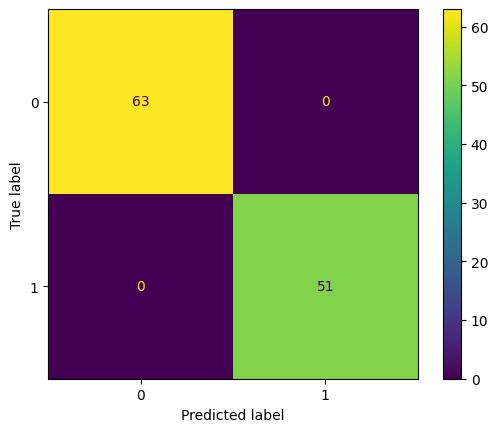

In [23]:
#_Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(test_true_labels, test_predicted_labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [28]:
#_F1 Score
from sklearn.metrics import f1_score

# Assuming test_labels are the true labels and test_predictions are the predicted labels
f1_micro = f1_score(test_labels, test_predictions, average='micro')
f1_macro = f1_score(test_labels, test_predictions, average='macro')

print("Micro-average F1 Score:", f1_micro)
print("Macro-average F1 Score:", f1_macro)

Micro-average F1 Score: 1.0
Macro-average F1 Score: 1.0
